In [1]:
# Mount Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Specify working directory.
FOLDERNAME = 'cs231n/project/'
%cd /content/drive/My\ Drive/$FOLDERNAME

# Ensure that the Python interpreter of the Colab VM can load python files from
# within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive
/content/drive/My Drive/cs231n/project


In [2]:
img_path = '/content/drive/My Drive/cs231n/project/dataset/frames/train/'
vid = 'S001_M_COUG_WLK_RGT'

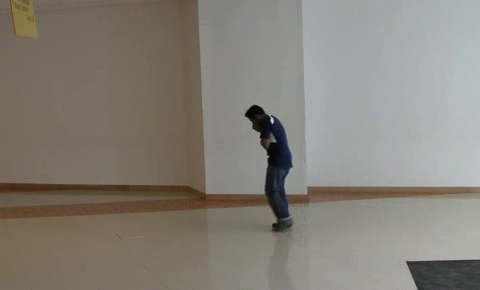

In [3]:
import cv2
import os
from google.colab.patches import cv2_imshow

im = cv2.imread(os.path.join(img_path, vid, 'frame8.jpg'))
cv2_imshow(im)

In [4]:
!unzip -o "dataset/hrnet_raw/hrnet-20210510T182703Z-006.zip" -d "/content/"

Archive:  dataset/hrnet_raw/hrnet-20210510T182703Z-006.zip
  inflating: /content/hrnet/S019_F_WIPE_WLK_FCE.avi.npy  
  inflating: /content/hrnet/S007_M_STRE_STD_RGT.avi.npy  
  inflating: /content/hrnet/S009_M_STRE_STD_LFT_HF.avi.npy  
  inflating: /content/hrnet/S018_M_WIPE_STD_FCE.avi.npy  
  inflating: /content/hrnet/S001_M_WAVE_WLK_LFT.avi.npy  
  inflating: /content/hrnet/S002_M_CALL_STD_LFT.avi.npy  
  inflating: /content/hrnet/S019_F_DRIN_STD_FCE_HF.avi.npy  
  inflating: /content/hrnet/S017_F_WIPE_STD_FCE_HF.avi.npy  
  inflating: /content/hrnet/S002_M_SNEE_WLK_RGT.avi.npy  
  inflating: /content/hrnet/S006_M_STRE_WLK_LFT.avi.npy  
  inflating: /content/hrnet/S008_M_STRE_STD_RGT_HF.avi.npy  
  inflating: /content/hrnet/S017_F_STRE_WLK_RGT.avi.npy  
  inflating: /content/hrnet/S001_M_DRIN_STD_FCE.avi.npy  
  inflating: /content/hrnet/S003_M_WAVE_WLK_FCE.avi.npy  
  inflating: /content/hrnet/S005_M_DRIN_STD_LFT.avi.npy  
  inflating: /content/hrnet/S003_M_WIPE_STD_LFT.avi.npy  
 

In [5]:
import os

heatmap_path = '/content/hrnet/'
len(os.listdir(heatmap_path))

187

In [8]:
# upload sample_video to /content and extract frames
video_read_path = '/content/sample_video.MP4'
try:
    os.mkdir('/content/frames')
except:
    pass

cap=cv2.VideoCapture(video_read_path)
cap.set(cv2.CAP_PROP_FPS, 20)
frame_rate=int(cap.get(5))

while(cap.isOpened()):
    frame_id = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
        break
    # Extract frames from each second.
    filename ="frame%d.jpg" % frame_id
    cv2.imwrite(os.path.join('/content/frames',filename), frame)
cap.release()


In [9]:
im = cv2.imread(os.path.join('/content/frames', f'frame{40}.jpg'))
print(im.shape)

(290, 480, 3)


In [12]:
import numpy as np

# uploaded the video's corresponding center, bbox and scale
center = np.load('/content/center.npy')
bbox = np.load('/content/bbox.npy')
scale = np.load('/content/scale.npy')

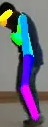

In [13]:
coord = list(map(int, bbox[40]))
w = coord[2] - coord[0]
h = coord[3] - coord[1]
img_crop = im[coord[1]:coord[3], coord[0]:coord[2], :]
cv2_imshow(img_crop)

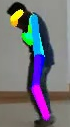

In [14]:
target_w, target_h = 48, 64
ratio = target_h / h
pad = int(target_w - w * ratio) // 2 
img_crop = im[coord[1]:coord[3], (coord[0]-pad):(coord[2]+pad), :]
cv2_imshow(img_crop)

In [15]:
img_crop.shape

(127, 70, 3)

(71, 17, 64, 48)


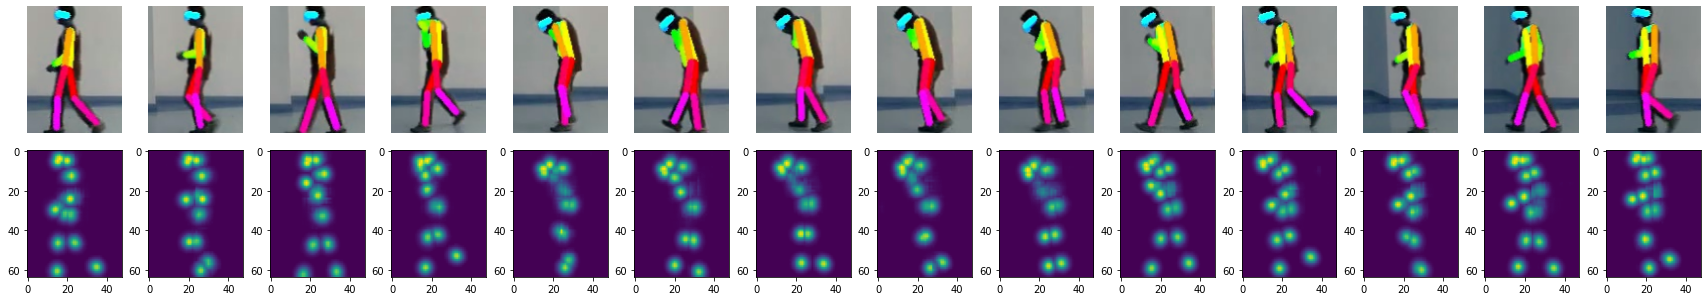

In [20]:
import numpy as np
import matplotlib.pyplot as plt

vid = 'S001_M_COUG_WLK_RGT'
sample = np.load(os.path.join(heatmap_path, vid+'.avi.npy'))
print(sample.shape)

target_w, target_h = 48, 64
frame_step = 2
frame_start = 25
frame_len = 14

f, axarr = plt.subplots(2,frame_len,figsize=(30,6))
plt.subplots_adjust(top = 1, bottom=0, hspace=-0.5, wspace=0.28)
wh_ratio = target_w / target_h

for i in range(frame_len):
  im = cv2.imread(os.path.join('/content/frames', f'frame{frame_start+frame_step*i}.jpg'))
  coord = list(map(int, bbox[frame_start+frame_step*i]))
  w = coord[2] - coord[0]
  h = coord[3] - coord[1]
  pad = int(h * wh_ratio - w) // 2 
  img_crop = im[coord[1]:coord[3], (coord[0]-pad):(coord[2]+pad), :]
  img_crop = cv2.resize(img_crop, (target_w*2, target_h*2))
  axarr[0][i].axis('off')
  axarr[0][i].imshow(img_crop)
  axarr[1][i].imshow(np.max(sample[frame_start+frame_step*i,:,:,:], axis=0))
plt.show()
